# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

In [24]:
#imports
import numpy as np
import matplotlib.pyplot as plt

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0   847k      0  0:01:48  0:01:48 --:--:--  796k
total 88
-rw-rw-r-- 1 jprezler jprezler 21264 Jun 30 09:08 image_denoising.ipynb
drwx------ 2 jprezler jprezler 57344 Jun  9 15:06 paintings
-rw-rw-r-- 1 jprezler jprezler     0 Jun 29 09:22 README.md
drwxrwxr-x 2 jprezler jprezler  4096 Jun 29 09:22 tests


In [3]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Albrecht_Duâ\x95\xa0Ãªrer_215.jpg',
 './paintings/Henri_Matisse_68.jpg',
 './paintings/Henri_Rousseau_58.jpg',
 './paintings/Edgar_Degas_350.jpg',
 './paintings/Rene_Magritte_87.jpg',
 './paintings/Rembrandt_167.jpg',
 './paintings/Henri_Rousseau_50.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Rembrandt_189.jpg',
 './paintings/Edgar_Degas_257.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_316.jpg',
 './paintings/Pablo_Picasso_9.jpg',
 './paintings/El_Greco_41.jpg',
 './paintings/Edgar_Degas_11.jpg',
 './paintings/Joan_Miro_48.jpg',
 './paintings/Edvard_Munch_51.jpg',
 './paintings/Pablo_Picasso_337.jpg',
 './paintings/Edgar_Degas_459.jpg',
 './paintings/Vincent_van_Gogh_420.jpg',
 './paintings/Edgar_Degas_70.jpg',
 './paintings/Edgar_Degas_589.jpg',
 './paintings/Mikhail_Vrubel_77.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Pablo_Picasso_401.jpg',
 './paintings/Caravaggio_25.jpg',
 './paintings/Vincent_van_Gogh_493.jpg',
 './paintings/Marc

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

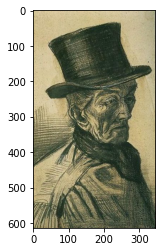

In [25]:
plt.imshow(plt.imread(dataset_paths[53]));

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [11]:
img_shape = plt.imread(dataset_paths[53]).shape
img_dim = (img_shape[0], img_shape[1])
print('shape : ', img_shape, '  dim : ', img_dim)

shape :  (614, 345, 3)   dim :  (614, 345)


❓ **What was in the image above?**

In [12]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [13]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [16]:
## list comprehension of half of the images as arrays
dataset_images = [plt.imread(dataset_paths[i]) for i in range(len(dataset_paths)//2)]

In [20]:
print(f'we have {len(dataset_images)} images')

we have 542 images


### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [21]:
for i in range(10):
    print(f'image {i} has shape of {dataset_images[i].shape}')

image 0 has shape of (1229, 644)
image 1 has shape of (459, 334, 3)
image 2 has shape of (450, 356, 3)
image 3 has shape of (671, 538, 3)
image 4 has shape of (484, 371, 3)
image 5 has shape of (886, 600, 3)
image 6 has shape of (348, 420, 3)
image 7 has shape of (234, 312, 3)
image 8 has shape of (614, 483, 3)
image 9 has shape of (666, 500, 3)


**There are images is grey scale and others in colors, and all different dimensions**

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [26]:
from tqdm import tqdm
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])


100%|██████████| 542/542 [00:00<00:00, 2659.59it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

**As we have seen, dimensions are different**

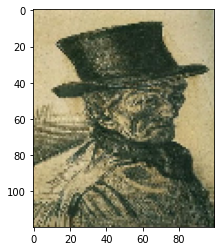

In [43]:
from tensorflow.image import resize
#testing the function on the same image
plt.imshow(np.array(resize(dataset_images[53], (120, 100)), dtype=np.int))

In [49]:
dataset_resized = np.array([resize(dataset_images[i], (120,100) ) for i in range(len(dataset_images))])

In [63]:
dataset_resized.shape

(542, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [66]:
dataset_scaled = dataset_resized/255.

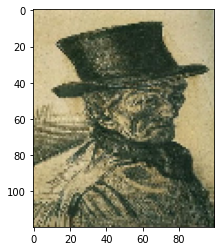

In [67]:
plt.imshow(dataset_scaled[53])

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [68]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(542, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

Text(0.5, 1.0, 'noisy image')

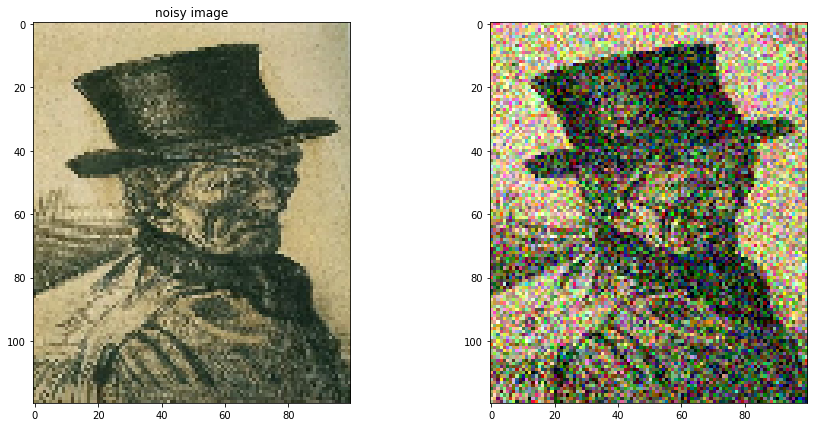

In [69]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].imshow(dataset_scaled[53])
ax[0].set_title('initial image')
ax[1].imshow(dataset_noisy[53])
ax[0].set_title('noisy image')

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [72]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.2)

In [73]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [74]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [102]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [103]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY
encoder = Sequential()
    
encoder.add(layers.Conv2D(8, (3,3), input_shape=(120, 100, 3), activation='relu'))
encoder.add(layers.MaxPooling2D(2))

encoder.add(layers.Conv2D(16, (3,3), activation='relu'))
encoder.add(layers.MaxPooling2D(2))

encoder.add(layers.Conv2D(32, (3,3), activation='relu'))
encoder.add(layers.MaxPooling2D(2))

encoder.add(layers.Flatten())
encoder.add(layers.Dense(latent_dimensions, activation='relu'))

encoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 118, 98, 8)        224       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 59, 49, 8)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 57, 47, 16)        1168      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 28, 23, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 26, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 10, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4160)            

👉 **Test your encoder below**

In [104]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
sequential_12 (Sequential)   (None, 6000)              24972032  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 24,978,707
Trainable params: 24,978,707
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [89]:
# The average random error for pixel value between 0 and 1 is 0.5
score_baseline = 0.5

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [105]:
from tensorflow.keras.callbacks import EarlyStopping
# first compile the model, use of mse as loss and mae as metric
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

es = EarlyStopping(patience=5, restore_best_weights=True)
history = autoencoder.fit(X_train, Y_train, batch_size=16, epochs=50, validation_split=0.2, callbacks=[es])

Epoch 1/50
22/22 [==============================] - 6s 243ms/step - loss: 0.0822 - mae: 0.2494 - val_loss: 0.0746 - val_mae: 0.2353
Epoch 2/50
22/22 [==============================] - 5s 235ms/step - loss: 0.0730 - mae: 0.2323 - val_loss: 0.0719 - val_mae: 0.2310
Epoch 3/50
22/22 [==============================] - 6s 265ms/step - loss: 0.0704 - mae: 0.2271 - val_loss: 0.0637 - val_mae: 0.2095
Epoch 4/50
22/22 [==============================] - 6s 280ms/step - loss: 0.0619 - mae: 0.2053 - val_loss: 0.0556 - val_mae: 0.1912
Epoch 5/50
22/22 [==============================] - 6s 280ms/step - loss: 0.0536 - mae: 0.1868 - val_loss: 0.0528 - val_mae: 0.1902
Epoch 6/50
22/22 [==============================] - 6s 279ms/step - loss: 0.0472 - mae: 0.1735 - val_loss: 0.0500 - val_mae: 0.1799
Epoch 7/50
22/22 [==============================] - 6s 281ms/step - loss: 0.0460 - mae: 0.1706 - val_loss: 0.0489 - val_mae: 0.1761
Epoch 8/50
22/22 [==============================] - 6s 279ms/step - loss: 0.

❓ **Plot your training and validation loss at each epoch using the cell below**

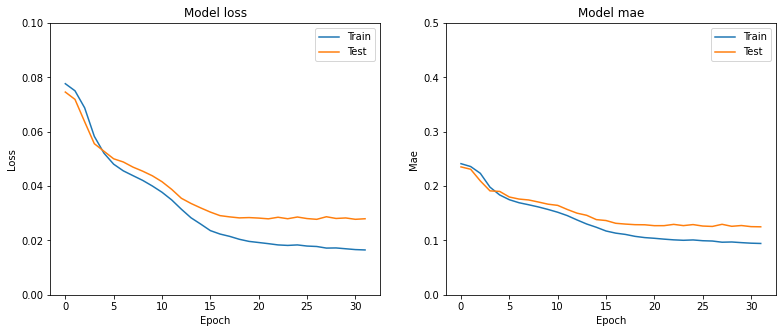

In [107]:
# Plot below your train/val loss history
fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylim((0,0.1))
ax[0].legend(['Train', 'Test'], loc='best')

ax[1].plot(history.history['mae'])
ax[1].plot(history.history['val_mae'])
ax[1].set_title('Model mae')
ax[1].set_ylabel('Mae')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim((0,0.5))
ax[1].legend(['Train', 'Test'], loc='best')
# Run also this code to save figure as jpg in path below (it's your job to ensure it works)

fig.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [111]:
# YOUR CODE HERE
Y_pred = autoencoder.predict(X_test)
score_test = autoencoder.evaluate(X_test, Y_test)[1]
score_test

4/4 [==============================] - 0s 72ms/step - loss: 0.0284 - mae: 0.1254


0.12537653744220734

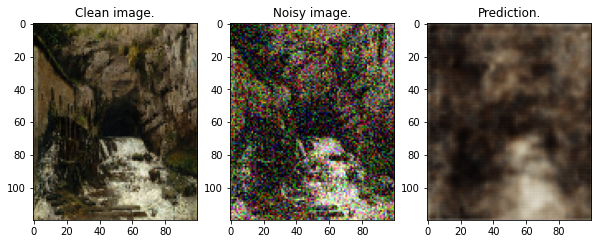

In [109]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 8

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [112]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()